<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/Jisha_Obukwelu_DSPT5_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

#**1. Load and clean the data (or determine the best method to drop observations when running tests)**



###Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import ttest_ind, ttest_1samp

###Import Data

In [3]:
#Getting started with the assignment
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-03 04:29:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-03 04:29:13 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [4]:
#Load Data
df = pd.read_csv("house-votes-84.data", 
                 header = None,
                 names = ['party', 'handicapped-infants', 'water-project',
                          'budget', 'physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups', 'anit-satellite-ban', 
                          'aid-to-contras', 'mx-missile', 'immigration', 
                          'synfuels', 'education', 'right-to-sue', 'crime', 
                          'duty-free', 'south-africa'])

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


###Clean Data

In [5]:
df = df.replace({'?':np.NaN, 'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


###Explore Data

In [6]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anit-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

###Separating Republican and Democratic Info

**Republican**

In [0]:
rep = df[df['party']=='republican']

In [9]:
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [10]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
rep.isnull().sum()

party                    0
handicapped-infants      3
water-project           20
budget                   4
physician-fee-freeze     3
el-salvador-aid          3
religious-groups         2
anit-satellite-ban       6
aid-to-contras          11
mx-missile               3
immigration              3
synfuels                 9
education               13
right-to-sue            10
crime                    7
duty-free               12
south-africa            22
dtype: int64

**Democrat**

In [0]:
dem = df[df['party']=='democrat']

In [13]:
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [14]:
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anit-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dem.isnull().sum()

party                    0
handicapped-infants      9
water-project           28
budget                   7
physician-fee-freeze     8
el-salvador-aid         12
religious-groups         9
anit-satellite-ban       8
aid-to-contras           4
mx-missile              19
immigration              4
synfuels                12
education               18
right-to-sue            15
crime                   10
duty-free               16
south-africa            82
dtype: int64

**Preliminary Explorations**

**Absention**
- which votes did each party abstain from.

In [16]:
#Comparing Absentions by Party
absention = pd.DataFrame.from_dict([dict(dem.isnull().sum()),dict(rep.isnull().sum())]).T.reset_index().rename(columns = {'index':'Issues', 0:'Democrats', 1:'Republicans' })
absention                                         

,Issues,Democrats,Republicans
0,party,0,0
1,handicapped-infants,9,3
2,water-project,28,20
3,budget,7,4
4,physician-fee-freeze,8,3
5,el-salvador-aid,12,3
6,religious-groups,9,2
7,anit-satellite-ban,8,6
8,aid-to-contras,4,11
9,mx-missile,19,3


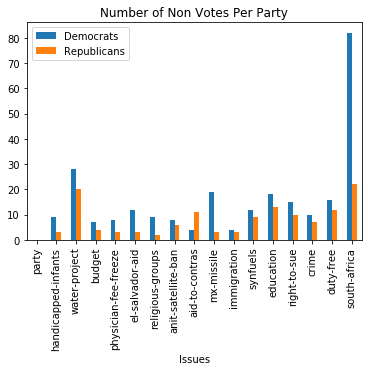

In [17]:
absention.plot(kind = 'bar', x = 'Issues', y = ['Democrats','Republicans']);
plt.title('Number of Non Votes Per Party');

In [18]:
#Comparing Voting Averages by Party
averages = pd.DataFrame.from_dict([dict(dem.mean()*100),dict(rep.mean()*100)]).T.reset_index().rename(columns =  {'index':'Issues', 0:'Democrats', 1:'Republicans' })
averages 

,Issues,Democrats,Republicans
0,handicapped-infants,60.465116,18.787879
1,water-project,50.209205,50.675676
2,budget,88.846154,13.414634
3,physician-fee-freeze,5.405405,98.787879
4,el-salvador-aid,21.568627,95.151515
5,religious-groups,47.674419,89.759036
6,anit-satellite-ban,77.220077,24.074074
7,aid-to-contras,82.889734,15.286624
8,mx-missile,75.806452,11.515152
9,immigration,47.148289,55.757576


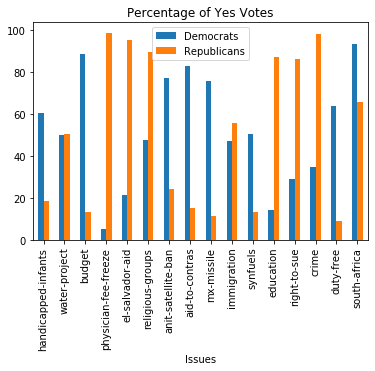

In [19]:
averages.plot(kind='bar', x = 'Issues', y = ['Democrats','Republicans']);
plt.title('Percentage of Yes Votes');

#**2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01**



In [20]:
#Handicapped infants
ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'],nan_policy='omit')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)

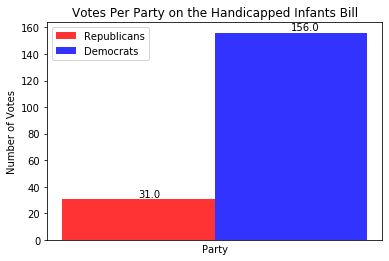

In [21]:
#Bar Chart showing Republican and Democratic Votes

# data to plot
n_groups = 1
y1 = rep['handicapped-infants'].sum()
y2 = dem['handicapped-infants'].sum()

#Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

#Creating bars
rects1 = plt.bar(index, y1, bar_width,
alpha=opacity,
color='r',
label='Republicans')

rects2 = plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='b',
label='Democrats')

#Labels
plt.xlabel('Party')
plt.ylabel('Number of Votes')
plt.title('Votes Per Party on the Handicapped Infants Bill')

#Placing numbers on graph
plt.text(x = 0, y = y1 + 1, s = y1)
plt.text(x = 0.35, y = y2 + 2, s = y2 )

plt.xticks([])
plt.legend()
plt.show()

In [22]:
print('{:.30f}'.format(ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'],nan_policy='omit').pvalue))
print('Average Republican votes', rep['handicapped-infants'].mean())
print('Average Democratic votes', dem['handicapped-infants'].mean())

0.000000000000000001613440327937
Average Republican votes 0.18787878787878787
Average Democratic votes 0.6046511627906976


* Conclusion: With the p-value close to 0, I can reject the null hypothesis that democrats and republicans do not have differing views on this topic. This is an issue that the Democrats seem to favor more than Republicans.

* T-Test results: Ttest_ind Result(statistic=-9.205264294809222 and the pvalue = 1.613440327937243e-18)

* Average Republican votes 0.18787878787878787 
* Average Democratic votes 0.6046511627906976






#**3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01**



In [23]:
ttest_ind(rep['physician-fee-freeze'], dem['physician-fee-freeze'],nan_policy='omit')

Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)

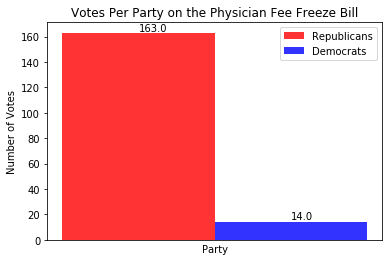

In [24]:
#Bar Chart showing Republican and Democratic Votes

# data to plot
n_groups = 1
y1 = rep['physician-fee-freeze'].sum()
y2 = dem['physician-fee-freeze'].sum()

#Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

#Creating bars
rects1 = plt.bar(index, y1, bar_width,
alpha=opacity,
color='r',
label='Republicans')

rects2 = plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='b',
label='Democrats')

#Labels
plt.xlabel('Party')
plt.ylabel('Number of Votes')
plt.title('Votes Per Party on the Physician Fee Freeze Bill')

#Placing numbers on graph
plt.text(x = 0, y = y1 + 1, s = y1)
plt.text(x = 0.35, y = y2 + 2, s = y2 )

plt.xticks([])
plt.legend()
plt.show()

In [25]:
print('{:.15f}'.format(ttest_ind(rep['physician-fee-freeze'], dem['physician-fee-freeze'],nan_policy='omit').pvalue))
print('Average Republican votes', rep['physician-fee-freeze'].mean())
print('Average Democratic votes', dem['physician-fee-freeze'].mean())

0.000000000000000
Average Republican votes 0.9878787878787879
Average Democratic votes 0.05405405405405406


In [26]:
ttest_1samp(rep['physician-fee-freeze'], .99, nan_policy='omit')

Ttest_1sampResult(statistic=-0.24824537633390723, pvalue=0.804255128517064)

* Conclusion: With the p-value of .804, I fail to reject the null hypothesis that democrats and republicans do not have differing views on this topic. This is an issue that Republicans seems to care about more than Democrats.

* T-Test results: Ttest_ind Result(statistic=-9.205264294809222 and the pvalue = 1.613440327937243e-18)

* Average Republican votes 49.36708157301406
* Average Democratic votes 1.994262314074344e-177


#**4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)**

In [27]:
ttest_ind(rep['water-project'], dem['water-project'],nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

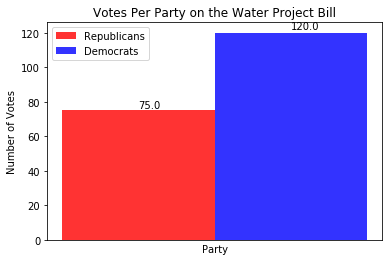

In [28]:
#Bar Chart showing Republican and Democratic Votes

# data to plot
n_groups = 1
y1 = rep['water-project'].sum()
y2 = dem['water-project'].sum()

#Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

#Creating bars
rects1 = plt.bar(index, y1, bar_width,
alpha=opacity,
color='r',
label='Republicans')

rects2 = plt.bar(index + bar_width, y2, bar_width,
alpha=opacity,
color='b',
label='Democrats')

#Labels
plt.xlabel('Party')
plt.ylabel('Number of Votes')
plt.title('Votes Per Party on the Water Project Bill')

#Placing numbers on graph
plt.text(x = 0, y = y1 + 1, s = y1)
plt.text(x = 0.35, y = y2 + 2, s = y2 )

plt.xticks([])
plt.legend()
plt.show()

In [29]:
print('{:.30f}'.format(ttest_ind(rep['water-project'], dem['water-project'],nan_policy='omit').pvalue))
print('Average Republican votes', rep['water-project'].mean())
print('Average Democratic votes', dem['water-project'].mean())

0.929155682399348537003902492870
Average Republican votes 0.5067567567567568
Average Democratic votes 0.502092050209205


* Conclusion: due to a p-value of .929 I fail to reject the null hypothesis that republican and democrat support for the water-project bill is different.

* T-Test results: Ttest_ind Result(statistic=0.08896538137868286 and the pvalue = 0.9291556823993485)

* Average Republican votes 0.5067567567567568 
* Average Democratic votes 0.502092050209205


#**Stretch goals:**

Refactor your code into functions so it's easy to rerun with arbitrary variables

**Attempt 1**

In [0]:
def voting_results(x,y):
  partisan_test = ttest_ind(x, y, nan_policy='omit').pvalue
  print (partisan_test)
  if partisan_test < 0.01 and x.mean() > y.mean():
    print ("More Democrats than Republicans")
  elif partisan_test < 0.01 and x.mean() < y.mean():
    print ("More Republicans thans Democrats")
  else:
    print ("Toss up")

In [31]:
voting_results(dem['south-africa'], rep['south-africa'])

3.652674361672226e-11
More Democrats than Republicans


In [32]:
voting_results(dem['immigration'], rep['immigration'])

0.08330248490425066
Toss up


In [33]:
voting_results(dem['water-project'], rep['water-project'])

0.9291556823993485
Toss up


**Attempt 2**

In [0]:
#Trying to create a database that shows whether the issue was a 
#republican or democratic favored issue or a tossup

#Getting columns
cols = df.columns[1:17]

#Statistics and Pvalue List
t_stats_list = []
p_val_list = []

#Iterating through columns and recording the t-statistic and p-value
for col in cols:
  t_stat, p_val = ttest_ind(rep[col].values, dem[col].values, nan_policy = 'omit')
  t_stats_list.append(t_stat)
  p_val_list.append(p_val)

#Creating a dataframe of the p-value and t-statistic
comparison_df = pd.DataFrame([p_val_list, t_stats_list], columns = cols).T.reset_index().rename(columns = {'index':'Issues', 0:'p-value', 1:'t-stat'})

#Checking for p-values where I reject the null hypothesis
comparison_df['significant'] = comparison_df['p-value'] < 0.01

#Function to iterate through p-values and determine if it's a republican or democratic favored issue
def partisan(x):
  if x == 0:
    return 'No'
  elif x < 0:
    return 'Dem'
  else:
    return 'Rep'

comparison_df['partisan'] = comparison_df['t-stat'].apply(partisan)
comparison_df.loc[comparison_df['significant'] == False, 'partisan'] = 'Tossup'

In [35]:
comparison_df

,Issues,p-value,t-stat,significant,partisan
0,handicapped-infants,1.613440e-18,-9.205264,True,Dem
1,water-project,9.291557e-01,0.088965,False,Tossup
2,budget,2.070340e-77,-23.212777,True,Dem
3,physician-fee-freeze,1.994262e-177,49.367082,True,Rep
4,el-salvador-aid,5.600520e-68,21.136693,True,Rep
5,religious-groups,2.393672e-20,9.737576,True,Rep
6,anit-satellite-ban,8.521033e-31,-12.526188,True,Dem
7,aid-to-contras,2.824718e-54,-18.052093,True,Dem
8,mx-missile,5.030793e-47,-16.437503,True,Dem
9,immigration,8.330248e-02,1.735912,False,Tossup
